## Clusterization

This notebook contains the code to perform a clusterization based on the answers given to the questionnaire by the participants to the testing session. Even though the sample is qualitative, this algorithm aims at verifying whether 
<br> a) it is possible to cluster in a sensible way these data <br> b) if clusters can be overlapped to the distinction into three groups

It is based on a **Principal Component Analysis** algorithm, extracted from this tutorial:
> Sharma, A. 2020. "Principal Component Analysis (PCA) in Python Tutorial". *DataCamp*. (Last access on Aug. 30th, 2023)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# The file is accessed and some modifications are implemented:
# => free-text answers are not considered
mytisse_data = pd.read_csv("data/data_cleaned.csv", sep=";")
mytisse_clust = mytisse_data.drop(columns=['id', 'part_id', 'q1', 'q3_justification', 'q6', 'q7', 'q8', 'q11'])

# => all string values are converted in a numeric format (int)
mapping = {'Palette A': 0, 'Palette B': 1}
mapping_arth = {'No': 0, 'Yes, in high school': 1, 'Yes, at university': 1, 'Yes, in other contexts': 1}
mytisse_clust['q3'] = mytisse_clust['q3'].map(mapping)
mytisse_clust['q9'] = mytisse_clust['q9'].map(mapping_arth)

mytisse_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group_id         24 non-null     object 
 1   q2_music_dance   24 non-null     float64
 2   q2_war           24 non-null     int64  
 3   q2_color         24 non-null     int64  
 4   q2_conservation  24 non-null     int64  
 5   q2_cubism        24 non-null     float64
 6   q3               24 non-null     int64  
 7   q4_anger         24 non-null     int64  
 8   q4_disgust       24 non-null     int64  
 9   q4_fear          24 non-null     int64  
 10  q4_interest      24 non-null     int64  
 11  q4_joy           24 non-null     int64  
 12  q4_sadness       24 non-null     float64
 13  q4_surprise      24 non-null     int64  
 14  q4_trust         24 non-null     int64  
 15  q5               24 non-null     int64  
 16  q9               24 non-null     int64  
 17  q10_anger        2

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pre-process the dataset:
# 1) The dataset is divided: group_id (1 col) + feature columns
# 2) In the latter, blank cells are filled with NaN
group_column = mytisse_clust.iloc[:, 0]
feature_columns = mytisse_clust.iloc[:, 1:]
feature_columns.fillna(0, inplace=True)

# It access the values of the columns
x = feature_columns.values
# It applies "fit_transform" method of the StandardScaler class 
# to x, which normalizes the values of the selected features by 
# subtracting the mean and dividing by the standard deviation.
x = StandardScaler().fit_transform(x)

# Calculation of mean and standard deviation
np.mean(x), np.std(x)


(-4.5102810375396984e-17, 0.9842509842514764)

In [4]:
# These values are converted in a dataframe
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_mytisse = pd.DataFrame(x,columns=feat_cols)
normalised_mytisse.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31
19,-0.502925,-0.114457,0.150756,-1.493103,1.513601,-0.707107,-0.915198,0.414698,-1.504144,0.192450,...,-0.689730,-0.074744,-0.585369,-0.562074,-0.208514,1.218736,-0.841302,1.098885,0.213102,0.0
20,-1.468542,-1.945771,-0.753778,-0.165900,0.054708,1.414214,-0.915198,-0.691164,-1.504144,1.732051,...,-1.477994,-0.971666,-0.585369,-0.562074,1.793224,1.218736,-0.841302,-1.373606,1.674372,0.0
21,0.462691,1.716857,1.055290,0.497701,0.784155,1.414214,-0.915198,-0.691164,-0.623670,0.192450,...,-1.477994,-0.971666,-0.585369,-0.562074,0.792355,1.218736,-0.841302,-1.373606,1.674372,0.0
22,1.428308,-0.114457,1.055290,-1.493103,-0.674738,1.414214,-0.915198,-0.691164,-0.623670,0.962250,...,0.886796,-0.971666,-0.585369,-0.562074,-1.209384,-0.668339,-0.841302,-0.549442,-0.517533,0.0
23,-0.502925,-1.945771,0.150756,1.161303,0.054708,-0.707107,0.240842,-0.691164,0.256805,0.962250,...,0.886796,1.719101,-0.585369,0.664269,0.792355,1.218736,2.113515,-0.549442,-1.248168,0.0


In [24]:
from sklearn.decomposition import PCA

# Perform a PCA in 2 components
pca_mytisse = PCA(n_components=2)
principalComponents_mytisse = pca_mytisse.fit_transform(x)

# Store values in a dataframe
principal_mytisse_Df = pd.DataFrame(data = principalComponents_mytisse
             , columns = ['principal component 1', 'principal component 2'])

# Calculate the explained variation ration (this value is indicative as
# the sample is *qualitative*)
print('Explained variation per principal component: {}'.format(pca_mytisse.explained_variance_ratio_))

# Obtain a merged dataframe where also information on the groups is stated
mytisse_merged = pd.concat([group_column, principal_mytisse_Df], axis=1).rename(columns={
    'principal component 1': 'Principal Component 1',
    'principal component 2': 'Principal Component 2',
    'group_id': 'Group'
    })

mytisse_merged

Explained variation per principal component: [0.17995535 0.14007967]


,Group,Principal Component 1,Principal Component 2
0,A,-1.639600,2.402255
1,A,-0.241163,2.632099
2,A,-2.640792,-2.155278
3,A,-1.327019,3.185911
4,B,-1.768705,1.960541
5,B,2.721806,-2.738431
6,B,3.646093,3.894121
7,C,-0.732045,1.150284
8,C,-1.677423,-0.844124
9,C,2.410414,-1.602203


<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

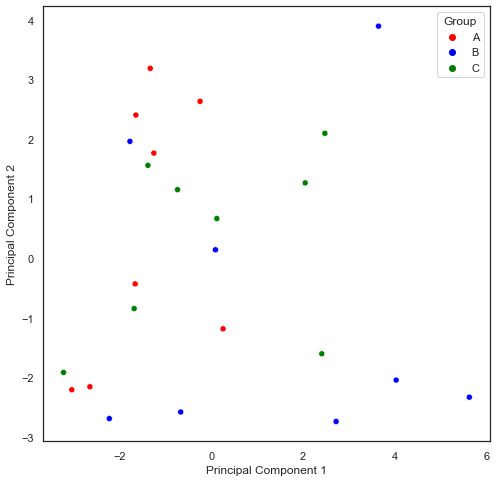

In [25]:
import seaborn as sns

# It plot the values according to the two components
sns.set(rc={"figure.figsize":(8, 8)})
sns.set_theme(style="white")
# A palette is assigned to chromatically distinguish 
# each participant on the basis of the group
sns.scatterplot(data=mytisse_merged, x='Principal Component 1', y='Principal Component 2', hue='Group', palette = {'A': 'red', 'B': 'blue', 'C': 'green'})